In [1]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd 
import tensorflow as tf

In [2]:
!pip install paddlepaddle-gpu==2.3.0.post110 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.0/374.0 KB 8.5 MB/s eta 0:00:00


In [3]:
!pip install "paddleocr>=2.0.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.9/305.9 KB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [4]:
!wget https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
!pip install -U layoutparser-0.0.0-py3-none-any.whl

--2023-04-04 18:47:01--  https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19145360 (18M) [application/octet-stream]
Saving to: ‘layoutparser-0.0.0-py3-none-any.whl’

layoutparser-0.0.0- 100%[===================>]  18.26M  2.58MB/s    in 20s     

2023-04-04 18:47:23 (914 KB/s) - ‘layoutparser-0.0.0-py3-none-any.whl’ saved [19145360/19145360]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./layoutparser-0.0.0-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=7b170af6f1da

In [5]:
import cv2
import layoutparser as lp
image = cv2.imread("/content/marks.jpg")

image = image[..., ::-1]

model = lp.PaddleDetectionLayoutModel(config_path="lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/config", threshold=0.3,
                                label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
                                enforce_cpu=False,
                                enable_mkldnn=True)

layout = model.detect(image)

download https://paddle-model-ecology.bj.bcebos.com/model/layout-parser/ppyolov2_r50vd_dcn_365e_publaynet.tar to /root/.paddledet/inference_model/ppyolov2_r50vd_dcn_365e_publaynet/ppyolov2_r50vd_dcn_365e_publaynet_infer/ppyolov2_r50vd_dcn_365e_publaynet.tar


100%|██████████| 221M/221M [00:31<00:00, 7.01MiB/s]


In [6]:
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=46.124755859375, y_1=410.52783203125, x_2=417.15380859375, y_2=428.2454833984375), text=None, id=None, type=Text, parent=None, next=None, score=0.9115655422210693), TextBlock(block=Rectangle(x_1=54.77862548828125, y_1=105.09619903564453, x_2=583.353759765625, y_2=126.85257720947266), text=None, id=None, type=Text, parent=None, next=None, score=0.8320969939231873), TextBlock(block=Rectangle(x_1=46.10089111328125, y_1=54.76002883911133, x_2=584.8065795898438, y_2=99.76910400390625), text=None, id=None, type=Title, parent=None, next=None, score=0.7171708941459656), TextBlock(block=Rectangle(x_1=45.811492919921875, y_1=483.1754455566406, x_2=364.67742919921875, y_2=689.4118041992188), text=None, id=None, type=Table, parent=None, next=None, score=0.6892925500869751), TextBlock(block=Rectangle(x_1=46.043121337890625, y_1=179.54629516601562, x_2=667.1802978515625, y_2=378.2434997558594), text=None, id=None, type=Figure, parent=None, next=None, sco

In [7]:
x_1=0
y_1=0
x_2=0
y_2=0

for l in layout:
  #print(l)
  if l.type == 'Table':
    x_1 = int(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)
    
    break

In [8]:
print(x_1,y_1,x_2,y_2)

45 483 364 689


In [9]:
img = image[y_1:y_2,x_1:x_2]

In [10]:
from google.colab.patches import cv2_imshow

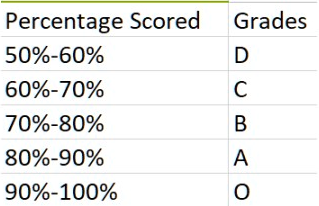

In [11]:
cv2_imshow(img)

In [12]:
from paddleocr import PaddleOCR, draw_ocr

In [13]:
ocr = PaddleOCR(lang='en')
image_height = img.shape[0]
image_width = img.shape[1]
output = ocr.ocr(img)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:15<00:00, 252kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:16<00:00, 596kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:03<00:00, 576kiB/s]

[2023/04/04 18:48:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local/

[2023/04/04 18:49:00] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/04/04 18:49:00] ppocr DEBUG: dt_boxes num : 12, elapse : 0.0775914192199707
[2023/04/04 18:49:00] ppocr DEBUG: rec_res num  : 12, elapse : 0.037593841552734375


In [14]:
output

[[[[[5.0, 10.0], [200.0, 10.0], [200.0, 31.0], [5.0, 31.0]],
   ('Percentage Scored', 0.9896497130393982)],
  [[[232.0, 9.0], [308.0, 9.0], [308.0, 31.0], [232.0, 31.0]],
   ('Grades', 0.9987590312957764)],
  [[[4.0, 43.0], [105.0, 43.0], [105.0, 65.0], [4.0, 65.0]],
   ('50%-60%', 0.9980161786079407)],
  [[[231.0, 44.0], [252.0, 44.0], [252.0, 67.0], [231.0, 67.0]],
   ('D', 0.9945843815803528)],
  [[[4.0, 77.0], [106.0, 77.0], [106.0, 100.0], [4.0, 100.0]],
   ('60%-70%', 0.9999403357505798)],
  [[[229.0, 76.0], [252.0, 76.0], [252.0, 102.0], [229.0, 102.0]],
   ('c', 0.5579957365989685)],
  [[[5.0, 112.0], [105.0, 112.0], [105.0, 134.0], [5.0, 134.0]],
   ('70%-80%', 0.9877062439918518)],
  [[[231.0, 113.0], [250.0, 113.0], [250.0, 135.0], [231.0, 135.0]],
   ('B', 0.9932271838188171)],
  [[[3.0, 146.0], [106.0, 146.0], [106.0, 168.0], [3.0, 168.0]],
   ('80%-90%', 0.9999502301216125)],
  [[[229.0, 146.0], [252.0, 146.0], [252.0, 171.0], [229.0, 171.0]],
   ('A', 0.9981095790863037)

In [15]:
boxes = []
texts = []
prob = []

In [16]:
len(output[0])

12

In [17]:
boxes = [line[0] for line in output[0]]
texts = [line[1][0] for line in output[0]]
probabilities = [line[1][1] for line in output[0]]

In [18]:
boxes

[[[5.0, 10.0], [200.0, 10.0], [200.0, 31.0], [5.0, 31.0]],
 [[232.0, 9.0], [308.0, 9.0], [308.0, 31.0], [232.0, 31.0]],
 [[4.0, 43.0], [105.0, 43.0], [105.0, 65.0], [4.0, 65.0]],
 [[231.0, 44.0], [252.0, 44.0], [252.0, 67.0], [231.0, 67.0]],
 [[4.0, 77.0], [106.0, 77.0], [106.0, 100.0], [4.0, 100.0]],
 [[229.0, 76.0], [252.0, 76.0], [252.0, 102.0], [229.0, 102.0]],
 [[5.0, 112.0], [105.0, 112.0], [105.0, 134.0], [5.0, 134.0]],
 [[231.0, 113.0], [250.0, 113.0], [250.0, 135.0], [231.0, 135.0]],
 [[3.0, 146.0], [106.0, 146.0], [106.0, 168.0], [3.0, 168.0]],
 [[229.0, 146.0], [252.0, 146.0], [252.0, 171.0], [229.0, 171.0]],
 [[4.0, 180.0], [119.0, 180.0], [119.0, 202.0], [4.0, 202.0]],
 [[230.0, 179.0], [253.0, 179.0], [253.0, 203.0], [230.0, 203.0]]]

In [19]:
image_boxes = img.copy()

In [20]:
for box,text in zip(boxes,texts):
  cv2.rectangle(image_boxes, (int(box[0][0]),int(box[0][1])), (int(box[2][0]),int(box[2][1])),(0,0,255),1)
  cv2.putText(image_boxes, text,(int(box[0][0]),int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(222,0,0),1)

In [21]:
cv2.imwrite('detections.jpg', image_boxes)

True

In [22]:
im = img.copy()

In [23]:
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])
  y_h, y_v = int(box[0][1]),0
  width_h,width_v = image_width, int(box[2][0]-box[0][0])
  height_h,height_v = int(box[2][1]-box[0][1]),image_height

  horiz_boxes.append([x_h,y_h,x_h+width_h,y_h+height_h])
  vert_boxes.append([x_v,y_v,x_v+width_v,y_v+height_v])

  cv2.rectangle(im,(x_h,y_h), (x_h+width_h,y_h+height_h),(0,0,255),1)
  cv2.rectangle(im,(x_v,y_v), (x_v+width_v,y_v+height_v),(0,255,0),1)
  

In [24]:
cv2.imwrite('horiz_vert.jpg',im)

True

In [25]:
box

[[230.0, 179.0], [253.0, 179.0], [253.0, 203.0], [230.0, 203.0]]

In [26]:
horiz_out = tf.image.non_max_suppression(
    horiz_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [27]:
horiz_lines = np.sort(np.array(horiz_out))
print(horiz_lines)

[ 1  2  4  7  8 10]


In [28]:
vert_out = tf.image.non_max_suppression(
    vert_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [29]:
print(vert_out)

tf.Tensor([8 1], shape=(2,), dtype=int32)


In [30]:
vert_lines = np.sort(np.array(vert_out))
print(vert_lines)

[1 8]


In [31]:
out_array = [["" for i in range(len(vert_lines))] for j in range(len(horiz_lines))]
print(np.array(out_array).shape)
print(out_array)

(6, 2)
[['', ''], ['', ''], ['', ''], ['', ''], ['', ''], ['', '']]


In [32]:
unordered_boxes = []

for i in vert_lines:
  print(vert_boxes[i])
  unordered_boxes.append(vert_boxes[i][0])

[232, 0, 308, 206]
[3, 0, 106, 206]


In [33]:
ordered_boxes = np.argsort(unordered_boxes)
print(ordered_boxes)

[1 0]


In [34]:
def intersection(box_1, box_2):
  return [box_2[0], box_1[1],box_2[2], box_1[3]]

In [35]:
def iou(box_1, box_2):

  x_1 = max(box_1[0], box_2[0])
  y_1 = max(box_1[1], box_2[1])
  x_2 = min(box_1[2], box_2[2])
  y_2 = min(box_1[3], box_2[3])

  inter = abs(max((x_2 - x_1, 0)) * max((y_2 - y_1), 0))
  if inter == 0:
      return 0
      
  box_1_area = abs((box_1[2] - box_1[0]) * (box_1[3] - box_1[1]))
  box_2_area = abs((box_2[2] - box_2[0]) * (box_2[3] - box_2[1]))
  
  return inter / float(box_1_area + box_2_area - inter)

In [36]:
for i in range(len(horiz_lines)):
  for j in range(len(vert_lines)):
    resultant = intersection(horiz_boxes[horiz_lines[i]], vert_boxes[vert_lines[ordered_boxes[j]]] )

    for b in range(len(boxes)):
      the_box = [boxes[b][0][0],boxes[b][0][1],boxes[b][2][0],boxes[b][2][1]]
      if(iou(resultant,the_box)>0.1):
        out_array[i][j] = texts[b]

In [37]:
out_array=np.array(out_array)

In [38]:
out_array

array([['Percentage Scored', 'Grades'],
       ['50%-60%', 'D'],
       ['60%-70%', 'c'],
       ['70%-80%', 'B'],
       ['80%-90%', 'A'],
       ['90%-100%', '0']], dtype='<U17')

In [39]:
pd.DataFrame(out_array).to_csv('sample.csv')

In [40]:
!pip freeze>requirements.txt